### Load Libraries

In [1]:
import matplotlib.pyplot as plt
import os


from numpy import arange, array, cumsum
from pandas import read_csv, DataFrame
from numpy import zeros, median, linspace
from obspy import UTCDateTime
from numpy import isnan
from obspy import UTCDateTime

### Configurations

Several essential parameters are set. Only parameters in this cell have to be adjusted.

In [2]:
## save figure eventually?
save = True

## which data to be loaded
year = '2019'
cha  = 'BJZ'
mode = 'runw'

## path specifications
path = f'/home/andbro/Documents/ROMY/QualityCheck/{mode}/logs/'
path2plots = f'/home/andbro/Documents/ROMY/QualityCheck/{mode}/'


ifile = f'{year}_{cha}_overview'


Data is read from overview-files and sorted by doy (just to be sure). It is check for double entries. November is extracted and boundaries set.

In [3]:
## read data
data = read_csv(path+ifile, delimiter=",")


## sort data frame in case any mixup occured
data = data.sort_values(by=['doy'], ascending=True, axis=0)


## check for doubles 
doubles = 0
if data.doy.duplicated().any():
    doubles +=1
if doubles != 0:
    print(f"\n {doubles} doubles found")
    sys.exit


## extract November
data = data[(data.doy > 304) & (data.doy < 335)]
x1, x2  = 304.5, 334.5

#### Calculate daily shares

Daily shares are calulcated for each quality level individually relative to the overall samples per day. This avoids distortion of days with possibly less samples due to data gaps/errors.

In [4]:
max_samples_per_day = max(data.total_samples)

q0p = data.Q0/max_samples_per_day*100
q1p = data.Q1/max_samples_per_day*100
q2p = data.Q2/max_samples_per_day*100

#### Define month labels

In [5]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
months = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30 ,31, 30]
m_cum = cumsum(months)+1


# Check with Log File

Sometimes a log file is also written and here read an checked for data gaps...

In [6]:
log_no_data = f"{path}{year}-{cha}.log"

if os.path.isfile(f"{path}{year}-{cha}.log"):
    
    no_data = read_csv(log_no_data, header=0, names =["Date", "Channel", "Comment"])

    doy = []
    for i in no_data.Date.to_list():
        doy.append(UTCDateTime(i).julday)

    no_data["doy"] = doy    
    
else:
    print("no log file found !")
    no_data = DataFrame()
    no_data["doy"] = []

no log file found !


# Plot Quality Overview Shares

Plot with median frequency is generated

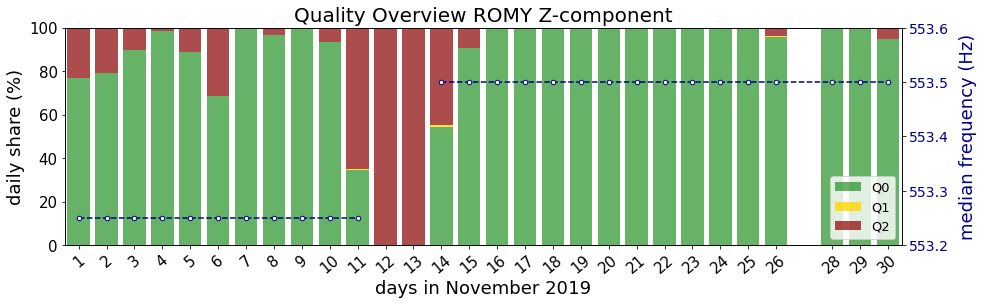

In [7]:
def __makeplot_shares_Nov2019_v1():

    fig, ax = plt.subplots(1, 1, figsize=(15,4))

    font=16

    width=0.8
    ax.bar(data.doy, q0p, width, color="green", alpha=0.6, label="Q0", edgecolor=None, aa=True)
    ax.bar(data.doy, q1p, width,bottom=q0p, color="gold", alpha=0.8, label="Q1", edgecolor=None, aa=True)
    ax.bar(data.doy, q2p, width,bottom=q0p+q1p, color="darkred", alpha=0.7, label="Q2", edgecolor=None, aa=True)

    # ax.plot(data.doy, data.bad_areas/data.Q2*100, zorder=1, color='black', ls='--', lw=0.8)


#     for gap in gaps:
#         ax.bar(gap, 100, width=width, color="grey", alpha=0.3, zorder=2, aa=True)


    ax.set_ylim(0,100)
    # ax.set_xticks(m_cum)
    # ax.set_xticklabels(month_names, rotation=20)

    ax.set_xticks(data.doy)
    ax.set_xticklabels(data.doy-304, rotation=40)


#     ax.axhline(95, color='black', ls=':', label="95%")

    ax.set_ylabel("daily share (%)", fontsize=font+2)
    ax.set_xlabel(f"days in November {year}", fontsize=font+2)

    ax.tick_params(axis='both', labelsize=font-1)

    ax.set_title(f"Quality Overview ROMY {cha[-1]}-component", fontsize=font+4)

    ax.legend(fontsize=font-3, loc="lower right")

    ax.set_xlim(x1,x2)


    ## add second access
    ax2 = ax.twinx()

    col2 = "darkblue"
    
    ax2.plot(data.doy, data.frequency_med, color=col2, ls='--', zorder=1)
    ax2.scatter(data.doy, data.frequency_med, color=col2, s=20, fc="white", label=r"f$_{median}$", zorder=2)

#     ax2.plot(data.doy, data.contrast, color=col2, ls='--', zorder=1)
#     ax2.scatter(data.doy, data.contrast, color=col2, s=20, fc="white", label=r"f$_{median}$", zorder=2)

    ax2.tick_params(axis='both', labelsize=font-2, labelcolor=col2)
    ax2.set_ylabel("median frequency (Hz)", fontsize=font+2, color=col2, labelpad=10)

    if cha == "BJZ":
        ax2.set_ylim(553.2, 553.6)
    if cha == "BJU":
        ax2.set_ylim(302.5, 303.0)
    if cha == "BJV":
        ax2.set_ylim(447.7, 447.8)

    plt.show();
    
    return fig


## _____________________________________

fig = __makeplot_shares_Nov2019_v1()


if save:
    fig.savefig(path2plots+"figs/"+f"{year}_{cha}_overview_Nov2019_shares_frequency", format="png", dpi=300)

Plot with median contrast is generated

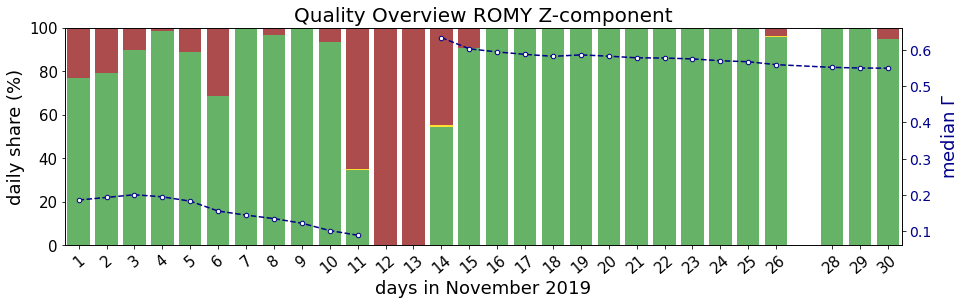


saving png ...



In [8]:
def __makeplot_shares_Nov2019_v2():

    fig, ax = plt.subplots(1, 1, figsize=(15,4))

    font=16

    width=0.8
    ax.bar(data.doy, q0p, width, color="green", alpha=0.6, label="Q0", edgecolor=None, aa=True)
    ax.bar(data.doy, q1p, width,bottom=q0p, color="gold", alpha=0.8, label="Q1", edgecolor=None, aa=True)
    ax.bar(data.doy, q2p, width,bottom=q0p+q1p, color="darkred", alpha=0.7, label="Q2", edgecolor=None, aa=True)

    # ax.plot(data.doy, data.bad_areas/data.Q2*100, zorder=1, color='black', ls='--', lw=0.8)


#     for gap in gaps:
#         ax.bar(gap, 100, width=width, color="grey", alpha=0.3, zorder=2, aa=True)


    ax.set_ylim(0,100)
    # ax.set_xticks(m_cum)
    # ax.set_xticklabels(month_names, rotation=20)

    ax.set_xticks(data.doy)
    ax.set_xticklabels(data.doy-304, rotation=40)


#     ax.axhline(95, color='black', ls=':', label="95%")

    ax.set_ylabel("daily share (%)", fontsize=font+2)
    ax.set_xlabel(f"days in November {year}", fontsize=font+2)

    ax.tick_params(axis='both', labelsize=font-1)

    ax.set_title(f"Quality Overview ROMY {cha[-1]}-component", fontsize=font+4)

#     ax.legend(fontsize=font-3, loc="lower right")

    ax.set_xlim(x1,x2)


    ## add second access
    ax2 = ax.twinx()

    col2 = "darkblue"
    
    ax2.plot(data.doy, data.contrast, color=col2, ls='--', zorder=1)
    ax2.scatter(data.doy, data.contrast, color=col2, s=20, fc="white", label=r"$\Gamma_{median}$", zorder=2)

    ax2.tick_params(axis='both', labelsize=font-2, labelcolor=col2)
    ax2.set_ylabel(r"median $\Gamma$", fontsize=font+2, color=col2, labelpad=10)


    plt.show();
    
    return fig


## _____________________________________

fig = __makeplot_shares_Nov2019_v2()


if save:
    fig.savefig(path2plots+"figs/"+f"{year}_{cha}_overview_Nov2019_shares_contrast.png", format="png", dpi=300)
    print("\nsaving png ...\n")

Calculate median of entire month

In [9]:
med = f'{round(data.frequency_med.median(),2)} Hz'
avg = f'{round(data.frequency_med.mean(),2)} +- {round(data.frequency_med.std(),3)} Hz'
med, avg

('553.5 Hz', '553.4 +- 0.125 Hz')

Median of frequency medians of entire month: {{med}}
Mean of frequency medians of entire month:   {{avg}}


# Plot Quality Overview Times

working on:  11 01
working on:  11 02
working on:  11 03
working on:  11 04
working on:  11 05
working on:  11 06
working on:  11 07
working on:  11 08
working on:  11 09
working on:  11 10
working on:  11 11
working on:  11 12
working on:  11 13
working on:  11 14
working on:  11 15
working on:  11 16
working on:  11 17
working on:  11 18
working on:  11 19
working on:  11 20
working on:  11 21
working on:  11 22
working on:  11 23
working on:  11 24
working on:  11 25
working on:  11 26
working on:  11 27
skipped 11-27
working on:  11 28
working on:  11 29
working on:  11 30

saving png ...



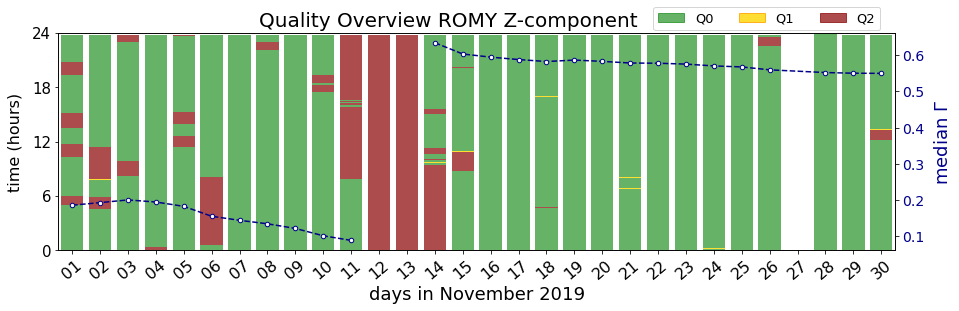

In [10]:
def __makeplot_times_Nov2019():

    if mode == "runy":
        hsw = 30
    elif mode == "runx":
        hsw = 90
    elif mode == "runz":
        hsw = 1        
    elif mode == "runq":
        hsw = 1     
    elif mode == "runw":
        hsw = 1          

    fig, ax = plt.subplots(1,1, figsize=(15,4))

    font = 16

    daylabels, dayticks = [], []
    
    j = 0
    for month in range(11,12):

        if month < 10:
            month = f'0{month}'

        for h, day in enumerate(range(1,31)):

            if day < 10:
                day = f'0{day}'
            

            try:
                print("working on: ", month, day)

                daylabels.append(str(f"{day}"))
                dayticks.append(int(day))                
                
                path_to_cfiles = f"/home/andbro/Documents/ROMY/QualityCheck/{mode}/Cfiles/{year}-{month}/{year}-{month}-{day}.C{cha[-1]}"

                ## read daily C-file
                df = read_csv(path_to_cfiles)

                ## extend at the begin
#                 if df.seconds.iloc[0] != 30:
#                     tmp_beg = DataFrame([[30, df.quality.iloc[0]],[86400, df.quality.iloc[-1]]], columns=["seconds", "quality"])
#                     df = concat([tmp_beg, df], ignore_index=True).sort_values(by="seconds")
    
                
                ## extend at the end
#                 if df.seconds.iloc[-1] != 86360:
#                     tmp_end = DataFrame([[86360, df.quality.iloc[-1]],[86400, df.quality.iloc[-1]]], columns=["seconds", "quality"])
#                     df = concat([df, tmp_end], ignore_index=True).sort_values(by="seconds")

                
                
                ## divide into bars of quality
                bars = []
                for l in range(df.seconds.size):
                    if l>0: 
                        bars.append(df.seconds[l] - df.seconds[l-1])

                qual = df.quality[:-1]  

                ## color dictionary
                col_dict = {0:'green',1:'gold', 2:'darkred'}
                alphas   = {0:0.6,1:0.8,2:0.7}

                ## plotting
                for i, val in enumerate(bars):

                    ax.bar(f"{year}-{month}-{day}", val, bottom=sum(bars[:i]), color=col_dict[qual[i]], alpha=alphas[qual[i]])

                j += 1
                
                del df
            except:
                print(f"skipped {month}-{day}")
                ax.bar(f"{year}-{month}-{day}", 86400, color="white")

                
            ## tweak x axis    
            ax.set_xticks(range(0,len(dayticks)))   
            ax.set_xticklabels(daylabels, fontsize=font, rotation=40)
            ax.set_xlabel(f"days in November {year}", fontsize=font+2)
            
            ## tweak y axis
            ax.set_yticks(linspace(0,86400,5))
            ax.set_yticklabels(linspace(0,24,5, dtype=int), fontsize=font-1)
            ax.set_ylim(0, 86400)
            ax.set_ylabel('time (hours)', fontsize=font, labelpad=10)

#             ax.set_title(f"Quality Overview ROMY.{cha} {year}            ", fontsize=font+4)
            ax.set_title(f"Quality Overview ROMY {cha[-1]}-component         ", fontsize=font+4)
            
            
            from matplotlib.patches import Polygon, Patch
            legend_elements = [Patch(facecolor='green'    , edgecolor='green', label='Q0', alpha=0.6),
                               Patch(facecolor='gold'    , edgecolor='orange', label='Q1', alpha=0.8),
                               Patch(facecolor='darkred', edgecolor='darkred', label='Q2', alpha=0.7),
                              ]        

            ax.legend(handles=legend_elements, fontsize=font-3, ncol=3, loc="upper right", bbox_to_anchor=[0.99, 1.15])      
    


    
    ## add second access
    ax2 = ax.twinx()

    col2 = "darkblue"
    
    ax2.plot(data.doy-305, data.contrast, color=col2, ls='--', zorder=3)
    ax2.scatter(data.doy-305, data.contrast, color=col2, s=20, fc="white", label=r"$\Gamma_{median}$", zorder=4)

    ax2.tick_params(axis='both', labelsize=font-2, labelcolor=col2)
    ax2.set_ylabel(r"median $\Gamma$", fontsize=font+2, color=col2, labelpad=10)
    
    
    ax.set_xlim(-0.5,j+0.5)
    ax.set_ylim(0, 86400)
    
    
    return fig

        
## _____________________________________

fig = __makeplot_times_Nov2019()


if save:
    fig.savefig(path2plots+"figs/"+f"{year}_{cha}_overview_Nov2019_times.png", format="png", dpi=300)
    print("\nsaving png ...\n")